## Data preparation

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro

In [40]:
data_f = pd.read_csv('data/femtodos.csv', on_bad_lines='skip', sep=";", decimal=",")
data_m = pd.read_csv('data/masctodos.csv', on_bad_lines='skip', sep=";", decimal=",")

In [41]:
data_f['Is.Obese'] = data_f['Is.Obese'].map({'YES': 1, 'NO': 0})
data_f['preh'] = data_f['preh'].map({'REGULAR': 0, 'PRE': 1})
data_m['Is.Obese'] = data_m['Is.Obese'].map({'YES': 1, 'NO': 0})
data_m['hyper'] = data_m['hyper'].map({'REGULAR': 0, 'HYPER': 1})

In [42]:
data_f.head(10)

,id,Age,Is.Obese,bmi,wc,hc,whr,SBP,DBP,preh
0,1,31,0,28.76,88,101,87,128.00,74.33,1
1,7,21,0,27.59,86,110,78,123.33,70.00,1
2,8,23,0,22.45,72,104,69,90.00,56.67,0
3,13,24,0,28.16,89,108,82,126.67,90.00,1
4,15,20,0,25.05,81,108,75,120.00,69.00,0
5,17,28,0,22.60,78,106,74,120.00,76.67,0
6,18,17,0,22.68,90,105,86,111.33,78.00,0
7,19,29,0,21.49,83,99,84,116.67,79.00,0
8,20,18,0,24.24,79,101,78,120.67,82.67,1
9,21,17,0,22.79,79,99,80,115.00,74.00,0


In [43]:
data_m.head(10)

,id,Age,Is.Obese,bmi,wc,hc,whr,SBP,DBP,hyper
0,1,20,0,27.94,95,112,85,120.00,80.00,0
1,7,19,0,18.65,69,85,81,100.00,63.33,0
2,8,31,0,27.62,102,107,95,106.67,70.00,0
3,13,22,0,24.96,86,107,80,120.00,80.00,0
4,15,19,0,25.15,82,99,83,126.67,80.00,0
5,17,31,0,22.50,79,97,81,170.00,103.33,1
6,20,21,0,25.31,92,104,88,130.00,90.00,0
7,21,20,0,25.73,90,94,96,130.00,80.00,0
8,22,17,0,25.16,84,99,85,142.00,82.67,1
9,23,25,0,25.12,84,104,81,166.67,106.67,1


The predictive variables included in the models were BMI, WC, HC, and WHR. In women we are investigating prehypertension (because only 8% of women had SBP above 140) and in men hypertension.

## Data visualisation

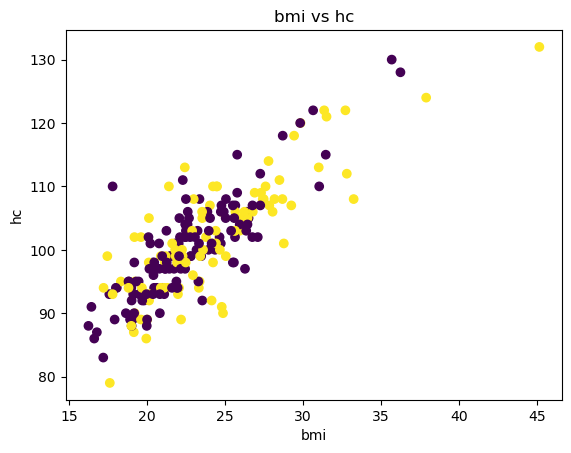

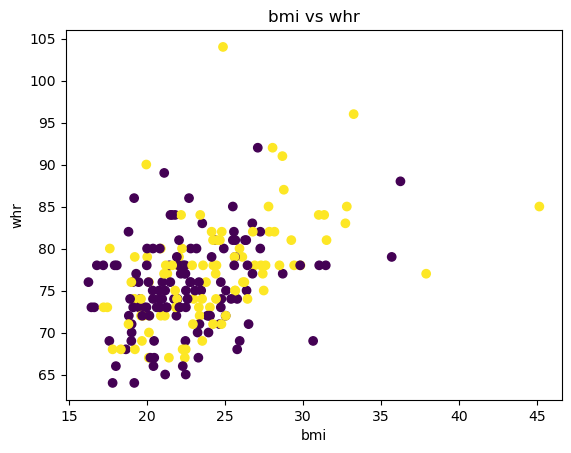

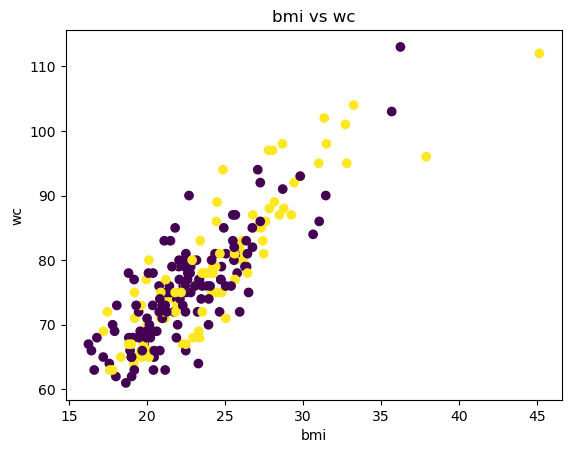

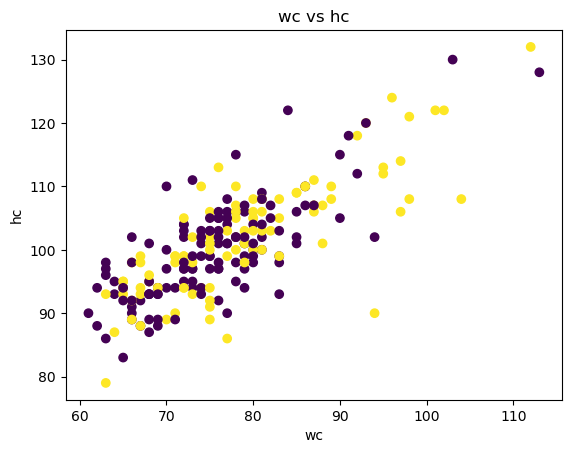

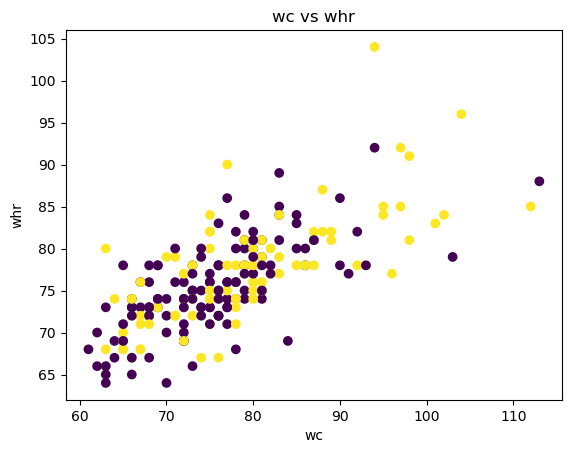

In [44]:
column_combinations = [['bmi','hc'], ['bmi','whr'], ['bmi','wc'], ['wc','hc'], ['wc','whr']]

for combination in column_combinations:
    x_col, y_col = combination

    plt.scatter(data_f[x_col], data_f[y_col], c = data_f['preh'])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')
    plt.show()

In [45]:
column_combinations = [['bmi', 'wc', 'hc'], ['wc', 'hc', 'whr'], ['bmi', 'wc', 'whr'], ['bmi', 'hc', 'whr']]

for combination in column_combinations:
    x_col, y_col, z_col = combination

    fig = px.scatter_3d(data_f,x=x_col, y=y_col, z=z_col, color = data_f['preh'])
    fig.show()

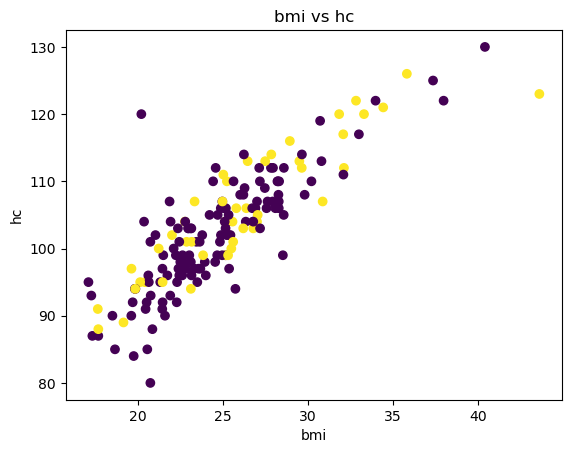

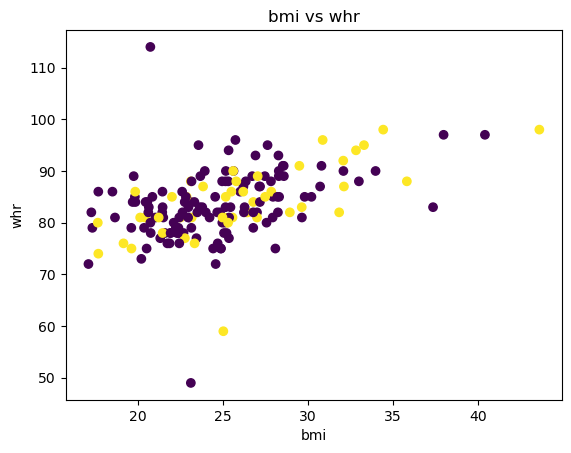

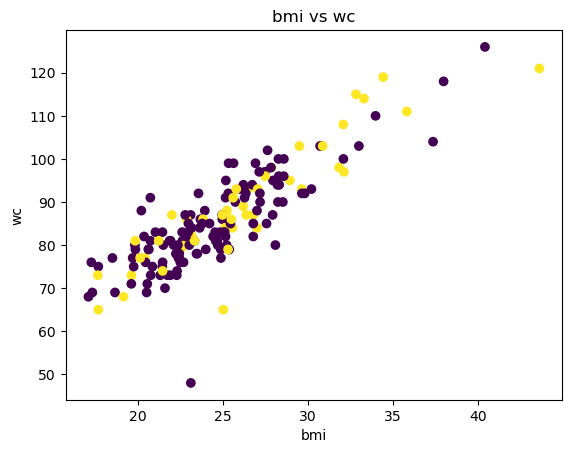

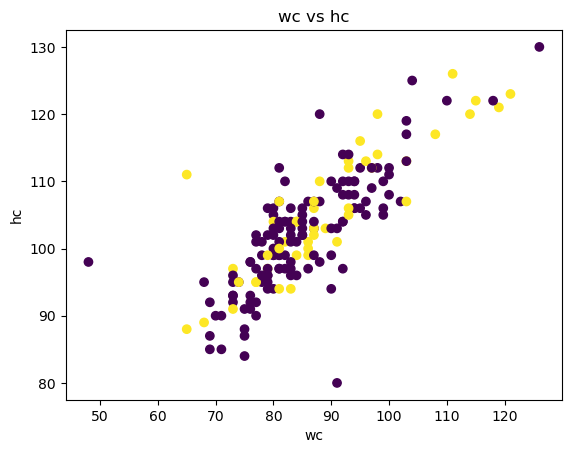

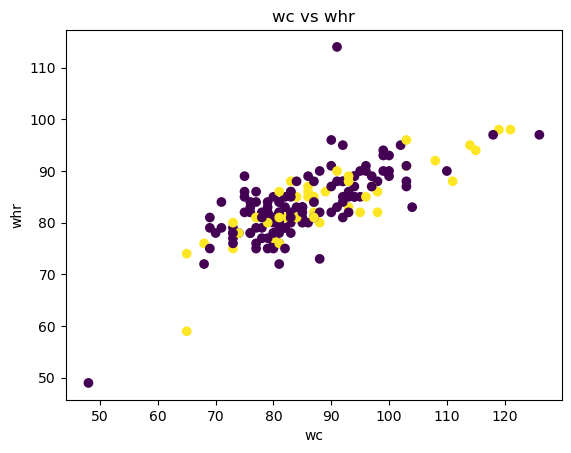

In [46]:
column_combinations = [['bmi','hc'], ['bmi','whr'], ['bmi','wc'], ['wc','hc'], ['wc','whr']]

for combination in column_combinations:
    x_col, y_col = combination

    plt.scatter(data_m[x_col], data_m[y_col], c = data_m['hyper'])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')
    plt.show()

In [47]:
column_combinations = [['bmi', 'wc', 'hc'], ['wc', 'hc', 'whr'], ['bmi', 'wc', 'whr'], ['bmi', 'hc', 'whr']]

for combination in column_combinations:
    x_col, y_col, z_col = combination

    fig = px.scatter_3d(data_m,x=x_col, y=y_col, z=z_col, color = data_m['hyper'])
    fig.show()

[Text(0, 0, '129'), Text(0, 0, '95')]

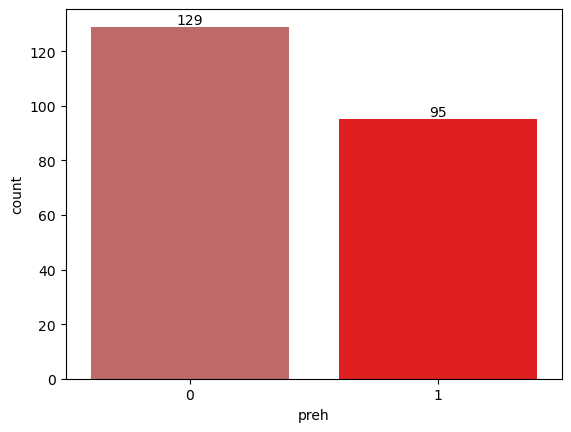

In [48]:
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data_f["preh"], palette= cols)
ax.bar_label(ax.containers[0])

[Text(0, 0, '128'), Text(0, 0, '47')]

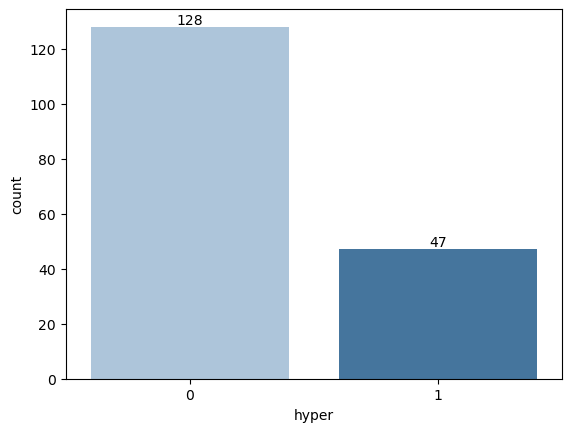

In [49]:
cols= ["#a5c6e2","#3776ab"]
ax = sns.countplot(x= data_m["hyper"], palette= cols)
ax.bar_label(ax.containers[0])

Prehypertension in woman is more prevalent in women that hypertansion in men.

## Statistical parameters analysis

In [50]:
data_f.describe().T

,count,mean,std,min,25%,50%,75%,max
id,224.0,113.316964,65.067626,1.00,57.75,113.500,169.2500,225.00
Age,224.0,22.598214,5.399651,16.00,19.00,21.000,24.0000,53.00
Is.Obese,224.0,0.058036,0.234335,0.00,0.00,0.000,0.0000,1.00
bmi,224.0,23.261518,4.073470,16.23,20.37,22.475,25.5075,45.15
wc,224.0,76.883929,9.449175,61.00,70.00,76.000,81.0000,113.00
hc,224.0,100.848214,8.560216,79.00,94.00,100.000,106.0000,132.00
whr,224.0,76.174107,5.843324,64.00,73.00,76.000,79.0000,104.00
SBP,224.0,118.680223,15.942405,10.67,108.67,117.000,127.7525,160.67
DBP,224.0,76.303348,12.256357,7.00,68.67,74.665,82.4150,120.00
preh,224.0,0.424107,0.495314,0.00,0.00,0.000,1.0000,1.00


In [51]:
data_m.describe().T

,count,mean,std,min,25%,50%,75%,max
id,175.0,88.000000,50.662281,1.00,44.500,88.00,131.500,175.0
Age,175.0,23.805714,6.713083,17.00,19.500,22.00,26.000,63.0
Is.Obese,175.0,0.102857,0.304644,0.00,0.000,0.00,0.000,1.0
bmi,175.0,24.953943,4.345820,17.09,22.165,24.82,27.085,43.6
wc,175.0,86.062857,11.466670,48.00,79.000,84.00,93.000,126.0
hc,175.0,102.931429,8.930503,80.00,97.000,103.00,108.000,130.0
whr,175.0,83.480000,6.755024,49.00,80.000,83.00,87.000,114.0
SBP,175.0,132.354400,14.443087,98.00,123.165,130.00,141.000,175.0
DBP,175.0,82.746400,11.473131,50.00,76.330,82.67,90.000,112.0
hyper,175.0,0.268571,0.444488,0.00,0.000,0.00,1.000,1.0


In [52]:
for col in data_f.columns:
    # Perform Shapiro-Wilk test on current column
    stat, p = shapiro(data_f[col])
    print(f"{col}: stat={stat:.3f}, p={p:.3f}")
    
    # Check whether p-value is less than 0.05 (alpha level)
    if p < 0.05:
        print(f"{col} is not normally distributed")
    else:
        print(f"{col} is normally distributed")

id: stat=0.955, p=0.000
id is not normally distributed
Age: stat=0.792, p=0.000
Age is not normally distributed
Is.Obese: stat=0.246, p=0.000
Is.Obese is not normally distributed
bmi: stat=0.921, p=0.000
bmi is not normally distributed
wc: stat=0.942, p=0.000
wc is not normally distributed
hc: stat=0.964, p=0.000
hc is not normally distributed
whr: stat=0.962, p=0.000
whr is not normally distributed
SBP: stat=0.916, p=0.000
SBP is not normally distributed
DBP: stat=0.940, p=0.000
DBP is not normally distributed
preh: stat=0.628, p=0.000
preh is not normally distributed


In [53]:
for col in data_m.columns:
    # Perform Shapiro-Wilk test on current column
    stat, p = shapiro(data_m[col])
    print(f"{col}: stat={stat:.3f}, p={p:.3f}")
    
    # Check whether p-value is less than 0.05 (alpha level)
    if p < 0.05:
        print(f"{col} is not normally distributed")
    else:
        print(f"{col} is normally distributed")

id: stat=0.955, p=0.000
id is not normally distributed
Age: stat=0.752, p=0.000
Age is not normally distributed
Is.Obese: stat=0.348, p=0.000
Is.Obese is not normally distributed
bmi: stat=0.940, p=0.000
bmi is not normally distributed
wc: stat=0.959, p=0.000
wc is not normally distributed
hc: stat=0.988, p=0.150
hc is normally distributed
whr: stat=0.923, p=0.000
whr is not normally distributed
SBP: stat=0.991, p=0.375
SBP is normally distributed
DBP: stat=0.993, p=0.526
DBP is normally distributed
hyper: stat=0.553, p=0.000
hyper is not normally distributed


- In women all variables are not normally distributed, in men only SBP and DBP have normal distribution.
- Men presented a higher value of systolic blood pressure (median = 130 mmHg), BMI (median = 24 kg/m2), WC (median = 84 cm), HC (median = 103 cm), and WHR (median = 0.83) than women.

The most important features (besides DBP and SBP which were the parameters directly used to assess hypertension) are: bmi, wc, hc, whr. That is because their correlation coefficients have the highest value (nearest to 1).

## Balancing data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_df, test_df = train_test_split(data_f, test_size=0.2, random_state=42)

In [56]:
class_0_count = train_df['preh'].value_counts()[0]
class_1_count = train_df['preh'].value_counts()[1]

# Calculate the number of samples to balance the data
balanced_count = class_0_count

# Create a balanced DataFrame by randomly sampling from the original DataFrame
df_balanced = pd.concat([
    train_df[train_df['preh'] == 0], # keep all samples with value 0
    train_df[train_df['preh'] == 1].sample(n=balanced_count, replace=True) # randomly sample n samples with value 1
])

# Verify the new class distribution
print(df_balanced['preh'].value_counts())

preh
0    101
1    101
Name: count, dtype: int64


In [57]:
train_dm, test_dm = train_test_split(data_m, test_size=0.2, random_state=42)

In [58]:
class_0_count = train_dm['hyper'].value_counts()[0]
class_1_count = train_dm['hyper'].value_counts()[1]

# Calculate the number of samples to balance the data
balanced_count = class_0_count

# Create a balanced DataFrame by randomly sampling from the original DataFrame
dm_balanced = pd.concat([
    train_dm[train_dm['hyper'] == 0], # keep all samples with value 0
    train_dm[train_dm['hyper'] == 1].sample(n=balanced_count, replace=True) # randomly sample n samples with value 1
])

# Verify the new class distribution
print(dm_balanced['hyper'].value_counts())

hyper
0    109
1    109
Name: count, dtype: int64


## CART and LogRegClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [77]:
class CARTClassifier:
    def __init__(self, train, test):
        self.train = train
        self.test = test
        
        self.predictors = [['bmi'],['wc'],['hc'],['whr'],['bmi','wc'],['bmi','hc'],['bmi','whr'],
                           ['wc','hc'],['wc','whr'],['hc','whr'],['bmi','wc','hc'],['wc','hc','whr'],
                           ['bmi','hc','whr'],['bmi', 'wc', 'hc', 'whr']]

    
    def fit(self):

        PR2 = []
        DEV = []
        MER = []

        for i in range(len(self.predictors)):
            X_train = self.train[self.predictors[i]]
            y_train = self.train.iloc[:, -1]
            x_test = self.test[self.predictors[i]]
            Y_test = self.test.iloc[:, -1]

            model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 class_weight=None)
            model.fit(X_train, y_train)

            Y_test_pred = model.predict(x_test)
            y_pred_prob = model.predict_proba(x_test)

            cnf_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)
            misclassification_error_rate = (cnf_matrix[0,1] + cnf_matrix[1,0])/ cnf_matrix.sum()

            deviance = log_loss(Y_test, y_pred_prob)

            report = classification_report(Y_test, Y_test_pred, output_dict=True)
            precision = report['1']['precision']
            recall = report['1']['recall']
            f1_score = report['1']['f1-score']

            pseudo_r2 = (2 * (precision * recall)) / (precision + recall + 0.00001) #the last factor is to make sure there is no division by zero

            PR2.append(pseudo_r2)
            DEV.append(deviance)
            MER.append(misclassification_error_rate)

        return pd.DataFrame(list(zip(PR2, DEV, MER, ["/".join(p) for p in self.predictors])), 
        columns=["pseudo_R2", "deviance", "missclassification_error_rate", "predictors"])

In [61]:
from sklearn.preprocessing import StandardScaler

class LogRegClassifier:
    def __init__(self, train, test, predictors):
        self.train = train
        self.test = test
        self.predictors = predictors
    
    def fit(self):
        
        X_train = self.train[self.predictors]
        y_train = self.train.iloc[:, -1]
        x_test = self.test[self.predictors]
        Y_test = self.test.iloc[:, -1]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        x_test_scaled = scaler.transform(x_test)

        # instantiate the model (using the default parameters)
        logreg = LogisticRegression(random_state=16)

        # fit the model with data
        logreg.fit(X_train_scaled, y_train)

        Y_test_pred = logreg.predict(x_test_scaled) 
        y_pred_prob = logreg.predict_proba(x_test_scaled)

        cnf_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)
        misclassification_error_rate = (cnf_matrix[0,1] + cnf_matrix[1,0]) / cnf_matrix.sum()

        deviance = log_loss(Y_test, y_pred_prob)

        report = classification_report(Y_test, Y_test_pred, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1_score = report['1']['f1-score']

        pseudo_r2 = (2 * (precision * recall)) / (precision + recall + 0.00001) # the last factor is to make sure there is no division by zero

        print(f"Deviance: {deviance:.3f}")
        print(f"Misclassification Error Rate: {misclassification_error_rate:.3f}")
        print(f"Pseudo R2: {pseudo_r2:.3f}")

In [78]:
cartF = CARTClassifier(train_df, test_df)
cartF.fit()

,pseudo_R2,deviance,missclassification_error_rate,predictors
0,0.432427,15.264641,0.466667,bmi
1,0.444439,3.051528,0.444444,wc
2,0.342852,2.286746,0.511111,hc
3,0.344823,2.232046,0.422222,whr
4,0.533328,11.213581,0.311111,bmi/wc
5,0.555551,12.815521,0.355556,bmi/hc
6,0.352936,17.621342,0.488889,bmi/whr
7,0.486482,15.249238,0.422222,wc/hc
8,0.457138,13.708911,0.422222,wc/whr
9,0.526311,14.497095,0.400000,hc/whr


In [63]:
cartF_b = CARTClassifier(df_balanced, test_df)
cartF_b.fit()

,pseudo_R2,deviance,missclassification_error_rate
0,0.411760,14.448268,0.444444
1,0.294113,3.093117,0.533333
2,0.487800,5.352426,0.466667
3,0.333328,2.264664,0.444444
4,0.444440,12.014551,0.333333
5,0.437495,14.417461,0.400000
6,0.555551,12.815521,0.355556
7,0.470583,14.439258,0.400000
8,0.529407,11.314385,0.355556
9,0.529407,12.846328,0.355556


In [64]:
logreg_classifierF = LogRegClassifier(train_df, test_df, ['bmi', 'wc', 'hc', 'whr'])
logreg_classifierF.fit()

Deviance: 0.679
Misclassification Error Rate: 0.378
Pseudo R2: 0.414


In [65]:
logreg_classifierF_b = LogRegClassifier(df_balanced, test_df, ['bmi', 'wc', 'hc', 'whr'])
logreg_classifierF_b.fit()

Deviance: 0.711
Misclassification Error Rate: 0.378
Pseudo R2: 0.514


In [66]:
cartM = CARTClassifier(train_dm, test_dm)
cartM.fit()

/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,pseudo_R2,deviance,missclassification_error_rate
0,0.090905,19.606163,0.571429
1,0.000000,8.638112,0.542857
2,0.099997,10.778963,0.514286
3,0.000000,4.723256,0.457143
4,0.173909,19.566555,0.542857
5,0.173909,19.566555,0.542857
6,0.399995,15.447280,0.428571
7,0.357138,18.536736,0.514286
8,0.384611,16.477099,0.457143
9,0.384611,16.477099,0.457143


In [67]:
cartF = CARTClassifier(dm_balanced, test_dm)
cartF.fit()

,pseudo_R2,deviance,missclassification_error_rate
0,0.086952,20.647566,0.600000
1,0.499995,8.604095,0.457143
2,0.307688,10.722589,0.514286
3,0.384611,4.611137,0.457143
4,0.105260,17.506917,0.485714
5,0.173909,19.566555,0.542857
6,0.249996,18.536736,0.514286
7,0.296291,19.566555,0.542857
8,0.307688,18.536736,0.514286
9,0.384611,16.477099,0.457143


In [68]:
logreg_classifierM = LogRegClassifier(train_dm, test_dm, ['bmi', 'wc', 'hc', 'whr'])
logreg_classifierM.fit()

Deviance: 0.851
Misclassification Error Rate: 0.457
Pseudo R2: 0.000


/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [69]:
logreg_classifierM_b = LogRegClassifier(dm_balanced, test_dm, ['bmi', 'wc', 'hc', 'whr'])
logreg_classifierM_b.fit()

Deviance: 0.724
Misclassification Error Rate: 0.571
Pseudo R2: 0.333


## CART and SVM

In [81]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

class CSClassifier:
    def __init__(self, train, test):
        self.train = train
        self.test = test
        
        self.predictors = [['bmi'],['wc'],['hc'],['whr'],['bmi','wc'],['bmi','hc'],['bmi','whr'],
                           ['wc','hc'],['wc','whr'],['hc','whr'],['bmi','wc','hc'],['wc','hc','whr'],
                           ['bmi','wc','whr'],['bmi','hc','whr'],['bmi', 'wc', 'hc', 'whr']]
    
    def fit(self):
        PR2 = []
        DEV = []
        MER = []
        
        for i in range(len(self.predictors)):
            X_train = self.train[self.predictors[i]]
            y_train = self.train.iloc[:, -1]
            x_test = self.test[self.predictors[i]]
            Y_test = self.test.iloc[:, -1]

            # SVM
            svm_model = svm.SVC(probability=True, random_state=16)
            svm_model.fit(X_train, y_train)
            X_train_svm = svm_model.predict_proba(X_train)[:, 1]  # Use SVM predictions as features
            
            # Decision Tree Classifier
            dt_model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 class_weight=None)
            dt_model.fit(X_train_svm.reshape(-1, 1), y_train)  # Reshape SVM predictions for Decision Tree

            X_test_svm = svm_model.predict_proba(x_test)[:, 1]  # Use SVM predictions as features for test data
            Y_test_pred_dt = dt_model.predict(X_test_svm.reshape(-1, 1))
            y_pred_prob_dt = dt_model.predict_proba(X_test_svm.reshape(-1, 1))

            # Metrics for Decision Tree
            cnf_matrix_dt = metrics.confusion_matrix(Y_test, Y_test_pred_dt)
            misclassification_error_rate_dt = (cnf_matrix_dt[0, 1] + cnf_matrix_dt[1, 0]) / cnf_matrix_dt.sum()
            deviance_dt = log_loss(Y_test, y_pred_prob_dt)
            report_dt = classification_report(Y_test, Y_test_pred_dt, output_dict=True)
            precision_dt = report_dt['1']['precision']
            recall_dt = report_dt['1']['recall']
            f1_score_dt = report_dt['1']['f1-score']
            pseudo_r2_dt = (2 * (precision_dt * recall_dt)) / (precision_dt + recall_dt + 0.00001)

            PR2.append(pseudo_r2_dt)
            DEV.append(deviance_dt)
            MER.append(misclassification_error_rate_dt)

        return pd.DataFrame(list(zip(PR2, DEV, MER, ["/".join(p) for p in self.predictors])), 
        columns=["pseudo_R2", "deviance", "missclassification_error_rate", "predictors"])

In [82]:
csF = CSClassifier(train_df, test_df)
csF.fit()

,pseudo_R2,deviance,missclassification_error_rate,predictors
0,0.333328,16.912791,0.533333,bmi
1,0.363631,3.850684,0.466667,wc
2,0.342852,2.277112,0.511111,hc
3,0.285710,2.256460,0.444444,whr
4,0.424237,14.432865,0.422222,bmi/wc
5,0.470583,14.417461,0.400000,bmi/hc
6,0.428567,19.223282,0.533333,bmi/whr
7,0.399995,16.105428,0.466667,wc/hc
8,0.444439,13.733325,0.444444,wc/whr
9,0.432427,15.332647,0.466667,hc/whr


In [83]:
csF_b = CSClassifier(df_balanced, test_df)
csF.fit()

,pseudo_R2,deviance,missclassification_error_rate,predictors
0,0.333328,16.912791,0.533333,bmi
1,0.363631,3.850684,0.466667,wc
2,0.342852,2.277112,0.511111,hc
3,0.285710,2.256460,0.444444,whr
4,0.424237,14.432865,0.422222,bmi/wc
5,0.470583,14.417461,0.400000,bmi/hc
6,0.428567,19.223282,0.533333,bmi/whr
7,0.399995,16.105428,0.466667,wc/hc
8,0.444439,13.733325,0.444444,wc/whr
9,0.432427,15.332647,0.466667,hc/whr


In [84]:
csM = CSClassifier(train_dm, test_dm)
csM.fit()

/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/konsternacja/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,pseudo_R2,deviance,missclassification_error_rate,predictors
0,0.199997,16.477099,0.457143,bmi
1,0.000000,8.638112,0.542857,wc
2,0.099997,10.781600,0.514286,hc
3,0.000000,4.723256,0.457143,whr
4,0.099997,18.536736,0.514286,bmi/wc
5,0.095234,19.566555,0.542857,bmi/hc
6,0.312495,22.656011,0.628571,bmi/whr
7,0.285709,20.596373,0.571429,wc/hc
8,0.307688,18.576344,0.514286,wc/whr
9,0.370366,17.506917,0.485714,hc/whr


In [85]:
csM_b = CSClassifier(dm_balanced, test_dm)
csM_b.fit()

,pseudo_R2,deviance,missclassification_error_rate,predictors
0,0.083329,21.677385,0.628571,bmi
1,0.499995,8.611462,0.457143,wc
2,0.307688,10.722589,0.514286,hc
3,0.384611,4.618633,0.457143,whr
4,0.239995,19.566555,0.542857,bmi/wc
5,0.190473,17.536107,0.485714,bmi/hc
6,0.260865,16.531743,0.485714,bmi/whr
7,0.239995,18.587929,0.542857,wc/hc
8,0.173909,19.566555,0.542857,wc/whr
9,0.173909,18.587929,0.542857,hc/whr
